In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas
import statsmodels.api as sm
from ast import literal_eval
import scipy

In [2]:
path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/movie_cast_AND_dummy_vars.csv'
df = pd.read_csv(path)
df.head(2)

,Unnamed: 0,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,is_News,is_Musical,is_Drama,is_Biography,is_Sport,is_Fantasy,is_Action,is_Adventure,is_Documentary,is_Thriller
0,0,7363,tt1179904,movie,Paranormal Activity,Paranormal Activity,0,2007,NaN,86,...,False,False,False,False,False,False,False,False,False,False
1,1,4907,tt2309260,movie,The Gallows,The Gallows,0,2015,NaN,81,...,False,False,False,False,False,False,False,False,False,True


In [3]:
adj_money = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/budget_revenue_adj.csv'
revenue_budget_adj = pd.read_csv(adj_money)
revenue_budget_adj.head()

,tconst,primaryTitle,startYear,budget,revenue,CPI ratio 2019,budget_adj,revenue_adj
0,tt1179904,Paranormal Activity,2007,230000,194183034,1.232937,283575.559996,2.394155e+08
1,tt2309260,The Gallows,2015,100000,42664410,1.078565,107856.485741,4.601633e+07
2,tt0876294,Zombie Diaries,2006,9300,2000000,1.268145,11793.747972,2.536290e+06
3,tt0907657,Once,2007,160000,20710513,1.232937,197269.954780,2.553476e+07
4,tt0374900,Napoleon Dynamite,2004,400000,46118097,1.353498,541399.214962,6.242075e+07


In [4]:
adj_money_lookup = revenue_budget_adj[['tconst', 'budget_adj', 'revenue_adj']].set_index('tconst').to_dict(orient='index')

In [5]:
df['budget_adj'] = df.apply(lambda x: adj_money_lookup[x.tconst]['budget_adj'], axis=1)
df['revenue_adj'] = df.apply(lambda x: adj_money_lookup[x.tconst]['revenue_adj'], axis=1)

In [6]:
df.columns

Index(['Unnamed: 0', 'index', 'tconst', 'titleType', 'primaryTitle',
       'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes',
       'genres', 'tmdb_id', 'og_language', 'budget', 'revenue', 'ratio', 'ROI',
       'averageRating', 'numVotes', 'Unnamed: 18', 'nconst', 'genres_list',
       'is_Family', 'is_Music', 'is_Romance', 'is_War', 'is_Comedy',
       'is_Horror', 'is_Sci-Fi', 'is_History', 'is_Crime', 'is_Western',
       'is_Mystery', 'is_News', 'is_Musical', 'is_Drama', 'is_Biography',
       'is_Sport', 'is_Fantasy', 'is_Action', 'is_Adventure', 'is_Documentary',
       'is_Thriller', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [7]:
cols_to_drop = ['Unnamed: 0', 'index', 'titleType', 'originalTitle', 'isAdult', 'endYear', 'runtimeMinutes', 'tmdb_id', 'og_language', 'ratio', 'ROI', 'averageRating', 'numVotes', 'Unnamed: 18', 'budget', 'revenue']
df = df.drop(columns=cols_to_drop, axis=1)
df.head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Drama,is_Biography,is_Sport,is_Fantasy,is_Action,is_Adventure,is_Documentary,is_Thriller,budget_adj,revenue_adj
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","['nm2209370', 'nm2913790', 'nm2104166', 'nm291...","['Horror', 'Mystery']",False,False,False,False,...,False,False,False,False,False,False,False,False,283575.559996,2.394155e+08
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","['nm3790547', 'nm6018502', 'nm4090362', 'nm225...","['Horror', 'Mystery', 'Thriller']",False,False,False,False,...,False,False,False,False,False,False,False,True,107856.485741,4.601633e+07


In [8]:
impurity_idx_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/impurity_index.csv'
impurity_idx = pd.read_csv(impurity_idx_path)
impurity_idx.head()

,tconst,HL+M,HL+O,NL+M,NL+O,a,b,i,l,w,Total PC,Impurity Index
0,tt0035423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.000
1,tt0118589,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,0.750
2,tt0120467,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.375
3,tt0120667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,0.375
4,tt0120679,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0,0.625


In [9]:
imp_idx_lookup = dict(zip(impurity_idx.tconst, impurity_idx['Impurity Index']))
df['d_race'] = df.apply(lambda x: imp_idx_lookup[x.tconst], axis=1)

In [10]:
starpower_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/starpowers_2.csv'
starpower = pd.read_csv(starpower_path)
print(starpower.shape)
starpower.head()

(3540, 5)


,tconst,nconst,starpowers,avg_starpowers_w0,max_starpowers
0,tt0035423,"['nm0000212', 'nm0413168', 'nm0000630', 'nm000...","[6.3428571428571425, 6.666666666666667, 6.4000...",6.402381,6.666667
1,tt0118589,"['nm0001014', 'nm0073160', 'nm0066586', 'nm000...","[0.0, 0.0, 6.0, 0.0]",1.500000,6.000000
2,tt0120467,"['nm0641168', 'nm0424682', 'nm0507915', 'nm083...","[7.7, 0.0, 0.0, 5.25]",3.237500,7.700000
3,tt0120667,"['nm0344435', 'nm0004821', 'nm0262635', 'nm000...","[6.05, 4.6000000000000005, 5.933333333333334, ...",5.514583,6.050000
4,tt0120679,"['nm0000161', 'nm0000547', 'nm0001691', 'nm053...","[5.869230769230768, 6.013333333333333, 6.58, 7.0]",6.365641,7.000000


In [11]:
starpower_avg_lookup = dict(zip(starpower['tconst'], starpower['avg_starpowers_w0']))
df['starpower_avg'] = df.apply(lambda x: starpower_avg_lookup[x.tconst], axis=1)
# df['starpower_avg'] = df['starpower_avg'].fillna(0)

In [12]:
df[df.starpower_avg.isna()]

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Sport,is_Fantasy,is_Action,is_Adventure,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg


In [13]:
starpower_max_lookup = dict(zip(starpower['tconst'], starpower['max_starpowers']))
df['starpower_max'] = df.apply(lambda x: starpower_max_lookup[x.tconst], axis=1)
# df['starpower_avg'] = df['starpower_avg'].fillna(0)

In [14]:
df[df.starpower_max.isna()]

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Fantasy,is_Action,is_Adventure,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max


In [15]:
cast_prop_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/cast_proportion.csv'
cast_prop = pd.read_csv(cast_prop_path)
print(cast_prop.shape)
cast_prop.head()

(3540, 6)


,tconst,actor,actress,actor_proportion,actress_proportion,actor_prop
0,tt0035423,3.0,1.0,0.75,0.25,higher
1,tt0118589,2.0,2.0,0.50,0.50,equal
2,tt0120467,4.0,0.0,1.00,0.00,higher
3,tt0120667,3.0,1.0,0.75,0.25,higher
4,tt0120679,2.0,2.0,0.50,0.50,equal


In [16]:
cast_prop_lookup = dict(zip(cast_prop.tconst, cast_prop.actor_proportion))
df['actor_proportion'] = df.apply(lambda x: cast_prop_lookup[x.tconst], axis=1)

In [17]:
df.head()

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Action,is_Adventure,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","['nm2209370', 'nm2913790', 'nm2104166', 'nm291...","['Horror', 'Mystery']",False,False,False,False,...,False,False,False,False,283575.559996,2.394155e+08,0.625,0.0000,0.00,0.50
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","['nm3790547', 'nm6018502', 'nm4090362', 'nm225...","['Horror', 'Mystery', 'Thriller']",False,False,False,False,...,False,False,False,True,107856.485741,4.601633e+07,0.375,0.0000,0.00,0.50
2,tt0876294,Zombie Diaries,2006,"Horror,Sci-Fi","['nm0014714', 'nm2428131', 'nm2408572', 'nm028...","['Horror', 'Sci-Fi']",False,False,False,False,...,False,False,False,False,11793.747972,2.536290e+06,0.500,0.0000,0.00,0.50
3,tt0907657,Once,2007,"Drama,Music,Romance","['nm0360598', 'nm2461627', 'nm2008013', 'nm247...","['Drama', 'Music', 'Romance']",False,True,True,False,...,False,False,False,False,197269.954780,2.553476e+07,0.625,0.0000,0.00,0.75
4,tt0374900,Napoleon Dynamite,2004,Comedy,"['nm1417647', 'nm0708293', 'nm0340973', 'nm108...",['Comedy'],False,False,False,False,...,False,False,False,False,541399.214962,6.242075e+07,0.625,1.3625,5.45,1.00


In [18]:
df.columns

Index(['tconst', 'primaryTitle', 'startYear', 'genres', 'nconst',
       'genres_list', 'is_Family', 'is_Music', 'is_Romance', 'is_War',
       'is_Comedy', 'is_Horror', 'is_Sci-Fi', 'is_History', 'is_Crime',
       'is_Western', 'is_Mystery', 'is_News', 'is_Musical', 'is_Drama',
       'is_Biography', 'is_Sport', 'is_Fantasy', 'is_Action', 'is_Adventure',
       'is_Documentary', 'is_Thriller', 'budget_adj', 'revenue_adj', 'd_race',
       'starpower_avg', 'starpower_max', 'actor_proportion'],
      dtype='object')

# Has at least one white person vs. All POCs

In [20]:
race_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/cleaned_race_name.csv'
race = pd.read_csv(race_path)
race['NEW_ACTOR_RACE'] = race['NEW_ACTOR_RACE'].str.upper()
print(race.shape)
race.head()

(5272, 6)


,Unnamed: 0,first_name,last_name,NEW_ACTOR_RACE,race,nconst
0,0,Lauren,Bacall,W,NL+W,nm0000002
1,1,Marlon,Brando,W,HL+W,nm0000008
2,2,Gong,Li,A,NL+A,nm0000084
3,3,Armin,Mueller-Stahl,W,NL+W,nm0000090
4,4,John,Cleese,I,NL+I,nm0000092


In [21]:
df.iloc[0].nconst

"['nm2209370', 'nm2913790', 'nm2104166', 'nm2910808']"

In [22]:
df.nconst = df.nconst.apply(literal_eval)
df.iloc[0].nconst

['nm2209370', 'nm2913790', 'nm2104166', 'nm2910808']

In [26]:
race_lookup = dict(zip(race.nconst, race.NEW_ACTOR_RACE))

def get_cast_race(cast):
  result = []
  # This is specifically for that guy Jon Daly
  for nconst in cast:
    if nconst == 'nm1789985':
      result.append('W')
    else:
      result.append(race_lookup[nconst])
  return result

In [28]:
df['cast_race'] = df.apply(lambda x: get_cast_race(x.nconst), axis=1)
df.head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Adventure,is_Documentary,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,cast_race
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","[nm2209370, nm2913790, nm2104166, nm2910808]","['Horror', 'Mystery']",False,False,False,False,...,False,False,False,283575.559996,2.394155e+08,0.625,0.0,0.0,0.5,"[W, B, W, NL+O]"
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","[nm3790547, nm6018502, nm4090362, nm2258992]","['Horror', 'Mystery', 'Thriller']",False,False,False,False,...,False,False,True,107856.485741,4.601633e+07,0.375,0.0,0.0,0.5,"[W, A, W, W]"


In [34]:
df['all_POC'] = df.apply(lambda x: 'W' not in x.cast_race, axis=1)

In [35]:
df.all_POC.value_counts()

False    3386
True      154
Name: all_POC, dtype: int64

# Majority white vs. majority POC

In [38]:
def get_w_prop(row):
  return row.cast_race.count('W') / len(row.cast_race)

In [39]:
df['W_prop'] = df.apply(lambda x: get_w_prop(x), axis=1)
df.head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,is_Thriller,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,cast_race,all_POC,W_prop
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","[nm2209370, nm2913790, nm2104166, nm2910808]","['Horror', 'Mystery']",False,False,False,False,...,False,283575.559996,2.394155e+08,0.625,0.0,0.0,0.5,"[W, B, W, NL+O]",False,0.50
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","[nm3790547, nm6018502, nm4090362, nm2258992]","['Horror', 'Mystery', 'Thriller']",False,False,False,False,...,True,107856.485741,4.601633e+07,0.375,0.0,0.0,0.5,"[W, A, W, W]",False,0.75


In [41]:
def get_w_majority(row):
  if row.W_prop > 0.5:
    return 'Major W'
  elif row.W_prop == 0.5:
    return 'Equal'
  else:
    return 'Major POC'
df['majority'] = df.apply(lambda x: get_w_majority(x), axis=1)
df.head(2)

,tconst,primaryTitle,startYear,genres,nconst,genres_list,is_Family,is_Music,is_Romance,is_War,...,budget_adj,revenue_adj,d_race,starpower_avg,starpower_max,actor_proportion,cast_race,all_POC,W_prop,majority
0,tt1179904,Paranormal Activity,2007,"Horror,Mystery","[nm2209370, nm2913790, nm2104166, nm2910808]","['Horror', 'Mystery']",False,False,False,False,...,283575.559996,2.394155e+08,0.625,0.0,0.0,0.5,"[W, B, W, NL+O]",False,0.50,Equal
1,tt2309260,The Gallows,2015,"Horror,Mystery,Thriller","[nm3790547, nm6018502, nm4090362, nm2258992]","['Horror', 'Mystery', 'Thriller']",False,False,False,False,...,107856.485741,4.601633e+07,0.375,0.0,0.0,0.5,"[W, A, W, W]",False,0.75,Major W


In [42]:
df.majority.value_counts()

Major W      1976
Equal         934
Major POC     630
Name: majority, dtype: int64

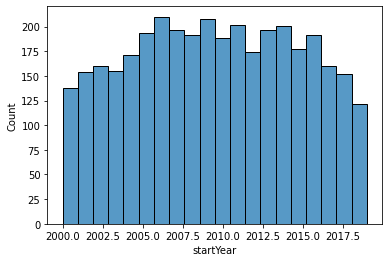

In [46]:
sns.histplot(df.startYear, bins=20)
plt.show()